In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import iqr
import pandas as pd

In [7]:
# Read in data

data = pd.read_csv('labels.txt')

In [8]:
data

,Label,Avglength,Medlength,Stdangle,Iqrangle
0,1,29.143504,27.009256,1.459294,1.636577
1,0,2.383829,1.414214,29.439803,45.000000
2,1,46.789089,38.209946,2.171741,3.270488
3,0,5.972353,4.000000,21.349845,0.000000
4,1,53.189768,51.000000,1.176314,1.818760
5,0,4.709457,3.000000,16.579114,0.000000
6,1,47.094478,40.012498,1.102085,1.325486
7,0,4.334981,3.000000,12.944780,0.000000
8,1,44.416170,36.055513,1.730261,2.792702
9,0,5.772716,4.000000,13.476894,0.000000


In [21]:
from sklearn.svm import SVC


In [53]:
# X = np.array([data.Avglength,data.Stdangle]).T
X = data.Avglength.as_matrix().reshape(-1,1)
y = data.Label.as_matrix()

In [54]:
clf = SVC()
model = clf.fit(X, y) 

In [57]:
print(clf.predict([[8]]))

[1]


In [58]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
# decision boundary for just length
xx = np.linspace(np.min(X),np.max(X),100)

In [80]:
pred_prev = 0
for x in xx:
    pred = clf.predict(x)
    if pred[0] > pred_prev:
        x_dec = x
        break
    pred_prev = pred

In [81]:
x_dec

6.8463534545454543

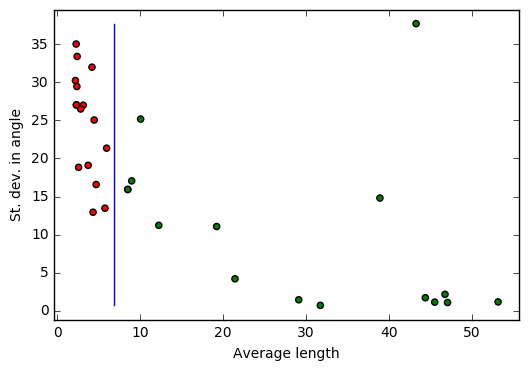

In [85]:
colors = ['g' if label else 'r' for label in data.Label]

plt.scatter(data.Avglength,data.Stdangle,c=colors)
plt.axis('equal')
plt.xlabel('Average length')
plt.ylabel('St. dev. in angle')
plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
plt.axis('tight')
plt.show()